## Applying regression to predict heart disease

### Import libraries ...

In [1]:
# import the library
%matplotlib inline

import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set_style('whitegrid')

### Loading data

In [7]:
df_clv = pnd.read_csv('C:\\Users\\hbenamor\\Desktop\\uc-heartdisease-datafolder\\processed.cleveland.data', header = None)
df_hds = df_clv
# rename columns since the file does not contain names.
df_hds.columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "goal"]
print(df_hds.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'],
      dtype='object')


In [8]:
df_hds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df_hds.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
#check types.
df_hds.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
goal          int64
dtype: object

In [11]:
# Some 'goal' values exceed 1 whereas they ar assumed to be either 0 or 1. They are set back to 1.
# 'thal' and 'ca' have bad values '?'. They are set to default "no issue" values for each.
#df_hds["goal"] = nmp.where(df_hds['goal'] >= 1, 1, df_hds['goal']) 
df_hds["ca"] = nmp.where(df_hds['ca']=='?', '0.0', df_hds['ca'])
df_hds["thal"] = nmp.where(df_hds['thal']=='?', '3.0', df_hds['thal'])

In [12]:
df_hds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [13]:
df_hds.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [14]:
df_hds.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
goal          int64
dtype: object

In [15]:
# the 2 variables 'thal and 'ca' are categorical and need to be transformed into numeric.
df_hds["thal"] = pnd.to_numeric(df_hds['thal'])
df_hds["ca"] = pnd.to_numeric(df_hds['ca'])

### Feature engineering

In [16]:
# goal is the variable to predict
X_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
y_column = ['goal']

### Training models: split data

In [17]:
# split data
threshold = 0.8
X = df_hds[X_columns]
y = df_hds[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (242, 13)
y_train (242, 1)
X_test (61, 13)
y_test (61, 1)


### Training models: train & evaluate various models

MODEL LinearRegression
MAE 0.5573770491803278
RMSE 0.8493005801304012


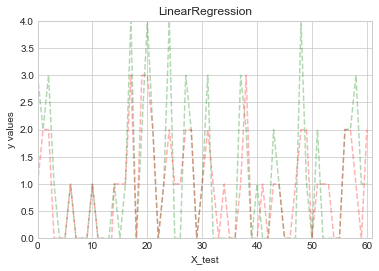

Feature Importance
          0         1
11       ca  0.375283
8     exang  0.350436
9   oldpeak  0.221120
2        cp  0.190004
10    slope  0.180621

MODEL RandomForestRegressor10
MAE 0.6557377049180327
RMSE 1.0864289525102224


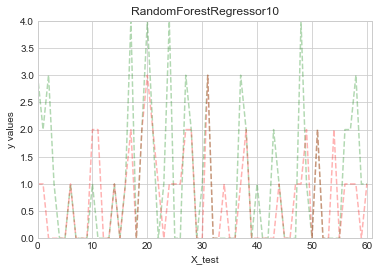

Feature Importance
           0         1
9    oldpeak  0.289501
12      thal  0.175644
11        ca  0.117396
7    thalach  0.100537
3   trestbps  0.069869

MODEL RandomForestRegressor100
MAE 0.639344262295082
RMSE 0.9495469152507922


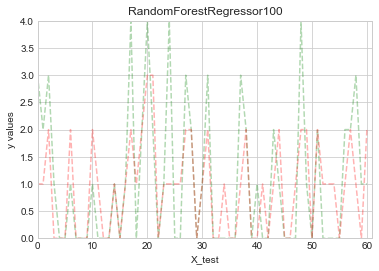

Feature Importance
          0         1
9   oldpeak  0.261167
12     thal  0.125732
11       ca  0.108151
7   thalach  0.104217
2        cp  0.089346

MODEL KNeighborsRegressor
MAE 0.9672131147540983
RMSE 1.3967174632441406


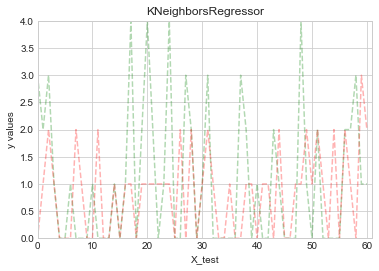


MODEL DecisionTreeRegressor
MAE 0.7704918032786885
RMSE 1.2610170238447336


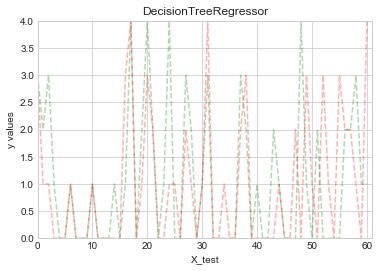

Feature Importance
           0         1
9    oldpeak  0.328229
2         cp  0.121813
11        ca  0.116785
3   trestbps  0.109441
4       chol  0.091731



,model,mae,rmse
0,LinearRegression,0.557377,0.849301
2,RandomForestRegressor100,0.639344,0.949547
1,RandomForestRegressor10,0.655738,1.086429
4,DecisionTreeRegressor,0.770492,1.261017
3,KNeighborsRegressor,0.967213,1.396717


In [19]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test).round()
    mae = mean_absolute_error(y_test, y_pred)
    rmse = nmp.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    #plt.scatter(y_test, y_pred, alpha=0.3)
    #plt.plot(range(0,2, 1), range(0, 2, 1), '--r', alpha=0.3, label='Line1')
    plt.plot(range(0, len(X_test), 1), y_test, '--g', alpha=0.3, label='True')
    plt.plot(range(0, len(X_test), 1), y_pred, '--r', alpha=0.3, label='True')
    #plt.plot(range(0, len(X_test), 1), (y_pred - nmp.asarray(y_test)), '--r', alpha=0.3, label='True')
    plt.title(m[0])
    #plt.xlabel('True Value')
    plt.xlabel('X_test')
    #plt.ylabel('Predict Value')
    plt.ylabel('y values')
    #plt.ylabel('y error')
    #plt.xlim([0, 4])
    plt.xlim([0, len(X_test)])
    plt.ylim([0, 4])
    #plt.ylim([-1, 1])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pnd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pnd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pnd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

The feature importance vary significantly from a model to another.
This is probably due to the nature of the goal that is a discrete value here and one needs to round the preicted value to obtain meaningful results by the prediction models.
The model would have been better suited to the analysis if the goal column contained the actual diameter norrowing ratio.
Probably, the classification models would be better suited.
Surprisingly, the age does not appear amon the most important feature in any regression model. This may be due to its magnitude.

### Training models: cross validation

In [20]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test).round()
        mae = mean_absolute_error(y_test, y_pred)
        rmse = nmp.sqrt(mean_squared_error(y_test, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


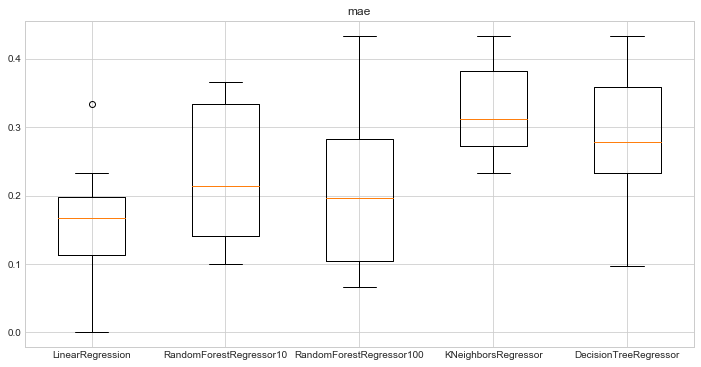

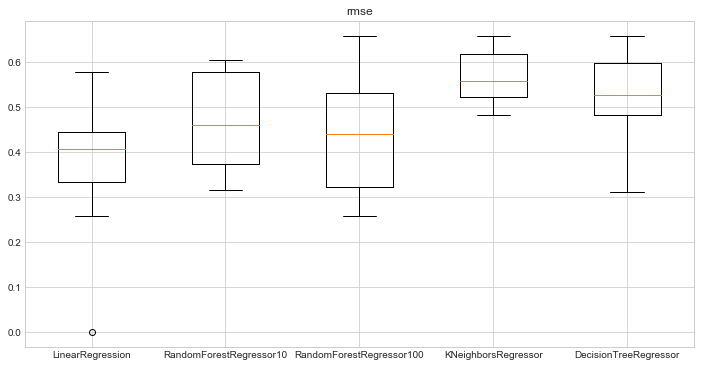

In [136]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

Results are similar for the 2 error measures. This was not the case without the rounding of the prediction.
Error values are samller which means that cross validation trained the models in a better way.
Models ranking is quite the same as in the previous results.
